Viewing classes in Directory

In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

dir_address = "D:/Garbage-Classification/Dataset"

classes = os.listdir(dir_address)
print(classes)

['test', 'train']


In [3]:
dir_address = "D:/Garbage-Classification/Dataset/train"

train_classes = os.listdir(dir_address)
print(train_classes)

['cardboad', 'glass', 'metal', 'paper', 'plastic', 'trash']


Visualizing Images in Dataset from each class

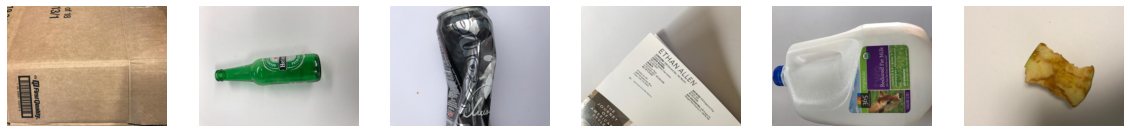

In [4]:
dir_with_examples = 'D:/Garbage-Classification/visualize'
files_per_row = 6
files_in_dir = os.listdir(dir_with_examples)
number_of_cols = files_per_row
number_of_rows = int(len(files_in_dir) / number_of_cols)

# Generate the subplots
fig, axs = plt.subplots(number_of_rows, number_of_cols)
fig.set_size_inches(20, 15, forward=True)

# Map each file to subplot
try:
  for i in range(0, len(files_in_dir)):
    file_name = files_in_dir[i]
    image = Image.open(f'{dir_with_examples}/{file_name}')
    row = math.floor(i / files_per_row)
    col = i % files_per_row
    axs[col].imshow(image)
    axs[col].axis('off')
except:
  pass
# Show the plot
plt.show()

Importing required Libraries for Model

In [5]:

from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import scipy
from scipy import ndimage
try:
    import scipy
    #print(scipy.__version__)
    #scipy.ndimage cannot be accessed until explicitly imported
    #print(ndimage.affine_transform.__doc__)
    from scipy import ndimage

except ImportError as e:
    print('test............',e)
    scipy = None

Data Configuration

In [ ]:
train = "D:/Garbage-Classification/Dataset/train"
test = "D:/Garbage-Classification/Dataset/test"

Creating a Generator for Training Set

In [ ]:
train_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow_from_directory(train,
                                                      target_size = (300,300),
                                                      batch_size = 32,
                                                      class_mode = 'sparse')

labels = (train_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

Creating a Generator for Testing Set

In [ ]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_generator = test_generator.flow_from_directory(test,
                                                    target_size = (300,300),
                                                    batch_size = 32,
                                                    class_mode = 'sparse')

test_labels = (test_generator.class_indices)
print(test_labels,'\n')

test_labels = dict((v,k) for k,v in test_labels.items())
print(test_labels)

In [ ]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

In [ ]:
for image_batch, label_batch in test_generator:
  break
image_batch.shape, label_batch.shape

Writing the labels into a text file 'Labels.txt '

In [ ]:
print(train_generator.class_indices)
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('Labels.txt', 'w') as file:
  file.write(Labels)

Model Architecture

In [ ]:
model=Sequential()

#Convolution blocks
model.add(Conv2D(32, kernel_size = (3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

#Classification layers
model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))


model.summary()

Model Compilation

In [ ]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Training the Model (batch_size = 32, epochs = 10)

In [ ]:
model.fit_generator(train_generator,
          epochs=10,
          steps_per_epoch=2184//32)

Testing Predictions

In [ ]:
import keras
import numpy as np
test_img = 'D:/Garbage-Classification/Dataset/test/metal/metal364.jpg'
img = keras.utils.load_img(test_img, target_size = (300,300))
img = keras.utils.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [ ]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

In [ ]:
test_img = 'D:/Garbage-Classification/Dataset/test/glass/glass421.jpg'
img = keras.utils.load_img(test_img, target_size = (300,300))
img = keras.utils.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [ ]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

In [ ]:
test_img = 'D:/Garbage-Classification/Dataset/test/plastic/plastic425.jpg'
img = keras.utils.load_img(test_img, target_size = (300,300))
img = keras.utils.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [ ]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

Saving model as 'model.h5'

In [ ]:
model.save('model.h5')